<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/uncertainPeriodicFrequentPatterns/basic/UPFPGrowthPlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Periodic Frequent patterns in Uncertain Temporal Databases using UPFPGrowthPlus

This tutorial has two parts. In the first part, we describe the basic approach to find Uncertain Periodic Frequent patterns in a temporal database using the UPFPGrowthPlus algorithm. In the final part, we describe an advanced approach, where we evaluate the UPFPGrowthPlus algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [5]:
!pip install -U pami #install the pami repository

2.   Downloading a sample dataset

In [6]:
inputFile = 'uncertain_Temporal_T10I4D200K.csv' #download a sample uncertain temporal database

3.   Printing few lines of a dataset to know its format.

In [7]:
!head -2 uncertain_Temporal_T10I4D200K.csv

1	25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834:0.688	0.758	0.612	0.44	0.249	0.862	0.523	0.472	0.334	0.093	0.808	0.73	0.04	0.385	0.229	0.151 
2	39	120	124	205	401	581	704	814	825	834:0.524	0.817	0.512	0.652	0.872	0.713	0.834	0.756	0.816	0.49 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Uncertain Periodic Frequent patterns using UPFPGrowthPlus

### Step 1: Import the libraries and specify the input parameters

In [8]:
minimumSupportCount = 300  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
maximumPeriodCount = 5000  #maximumPeriodCount is specified in count. However, the users can also specify maximumPeriodCount between 0 and 1.

### Step 2: Mining Uncertain Periodic Frequent patterns using UPFPGrowthPlus

In [9]:
from PAMI.uncertainPeriodicFrequentPattern.basic import UPFPGrowthPlus as alg #import the algorithm

obj = alg.UPFPGrowthPlus(iFile=inputFile, minSup=minimumSupportCount, maxPer=maximumPeriodCount, sep='\t') #initialize
obj.startMine()            #start the mining process

obj.save('uncertainPeriodicFrequentPatternsAtMinSupCount300.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm
Total No of patterns: 758
Runtime: 295.4466288089752
Memory (RSS): 5414215680
Memory (USS): 5393289216


### Step 3: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 1 and 2 with a different _minSup_ value.

In [10]:
!head 'uncertainPeriodicFrequentPatternsAtMinSupCount300.txt'

940 :[301.78, 2419] 
714 :[303.1, 2000] 
264 :[304.08, 1821] 
88 :[304.09, 1548] 
981 :[305.01, 1981] 
218 :[306.15, 1561] 
67 :[308.64, 2622] 
64 :[309.28, 2233] 
301 :[309.43, 2326] 
696 :[310.6, 2261] 


The storage format is: _uncertainPeriodicfrequentPattern:support_
***

## Part 2: Evaluating the UPFPGrowth algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [11]:
#Import the libraries
from PAMI.uncertainPeriodicFrequentPattern.basic import UPFPGrowthPlus as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'uncertain_Temporal_T10I4D200K.csv'
seperator='\t'
minimumSupportCountList = [500, 1000, 1500, 2000, 2500]
maxPer = 5000
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of UPFPGrowth

In [12]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of UPFPGrowth algorithm

### Step 3: Execute the algorithm at different minSup values

In [13]:
for minSupCount in minimumSupportCountList:
    obj = alg.UPFPGrowthPlus(inputFile, minSup=minSupCount, maxPer=maxPer, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['UPFPGrowthPlus', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm
Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm
Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm
Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm
Periodic Frequent patterns were generated successfully using UPFP-Growth++ algorithm


### Step 4: Print the Result

In [14]:
print(result)

        algorithm  minSup  patterns    runtime      memory
0  UPFPGrowthPlus     500       532  97.048988  5397004288
1  UPFPGrowthPlus    1000       337  63.079154  5326221312
2  UPFPGrowthPlus    1500       205  39.949615  5242068992
3  UPFPGrowthPlus    2000       134  38.369560  5183385600
4  UPFPGrowthPlus    2500        87  33.572152  5139349504


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

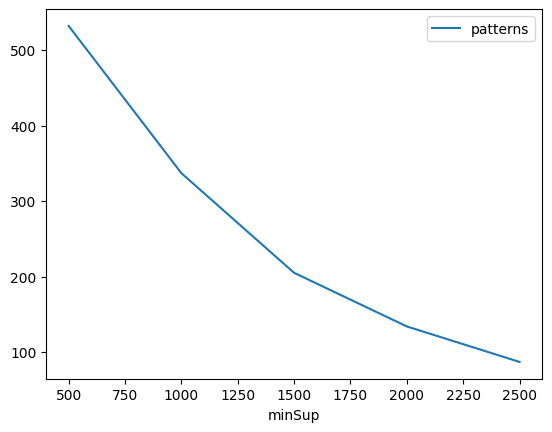

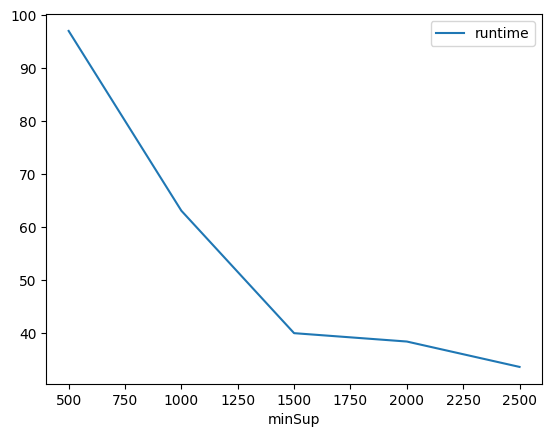

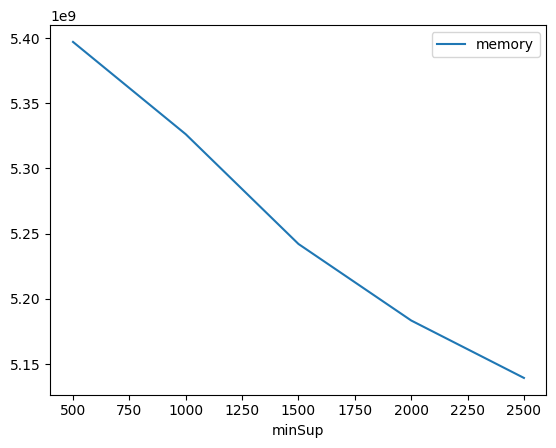

In [15]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib